In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
## Define a dataset
mean_01=np.array([1.0,0.5])
cov_01=np.array([[1.0,0.1],[0.1,1.2]])

mean_02=np.array([5.3,6.5])
cov_02=np.array([[1.0,0.1],[0.1,1.2]])

dist_01=np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02=np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape,dist_02.shape

(500L, 2L) (500L, 2L)


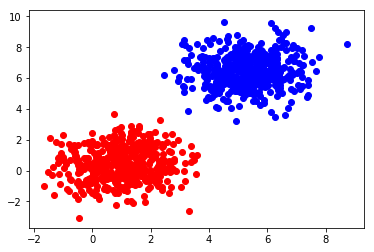

In [7]:
plt.scatter(dist_01[:,0], dist_01[:,1],color='red')
plt.scatter(dist_02[:,0], dist_02[:,1],color='blue')
plt.show()

In [13]:
#Input data :- (dist_01.shape[0]+dist_02.shape[0], #num features)
data=np.concatenate((dist_01,dist_02))
print data.shape

print data.min(), data.max()

(1000L, 2L)
-3.0526744305654008 9.65433308828184


In [12]:
temp=np.vstack((dist_01,dist_02))
print temp.shape

random_temp=np.hstack((dist_01,dist_02))
print random_temp.shape

## much more functionalities..

(1000L, 2L)
(500L, 4L)


In [14]:
## Try taking mean values with large magnitudes like 10000,0.5 etc. so then need
## feature scaling for it : normalize dataset : simply devide my maximum value.. decently scaling is done then..

In [19]:
## KMeans Clustering -> Parameter definition..
K=4 # Number of clusters
clusters ={}
for cx in range(K):
    params= {
        'centroid': np.random.uniform(data.min(),data.max(),(data.shape[1],)),
        'history':[], # history of cluster locations
        'points':[], # points in the cluster -> for centroid recalculations..
    }
    clusters[cx]=params

colors=['yellow','red','cyan','green']

In [20]:
#Defining a distance function
def distance(p1,p2):
    '''Euclidian Distance'''
    return np.sqrt(((p1-p2)**2).sum())

distance(np.array([0.0,0.0]),np.array([1.0,1.0]))

1.4142135623730951

In [ ]:
## Execution logic
for ix in range(data.shape[0])

In [21]:
np.random.uniform?

In [25]:
print np.zeros((2,)) ## Row vector
print "---"
print np.zeros((2,1))

[0. 0.]
---
[[0.]
 [0.]]
